In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

from utils import *
from utils_plotting import plot_embedding

# KiDS

In [4]:
kids = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv', sdss_cleaning=False)

Data shape: (502439, 37)
Droping NANs: 502439 left
Removing flags: 210401 left
Removing errors bigger than 1: 135040 left
Removing limiting magnitudes: 50084 left


In [5]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (91317, 44)
Droping NANs: 91317 left
Removing flags: 31908 left
Removing errors bigger than 1: 30018 left
Removing limiting magnitudes: 26237 left
Cleaning SDSS: 24021 left


# KiDS magnitudes

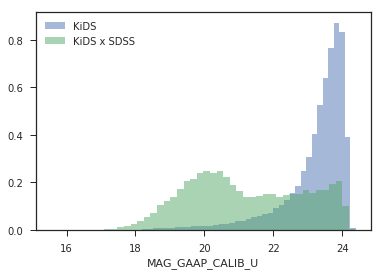

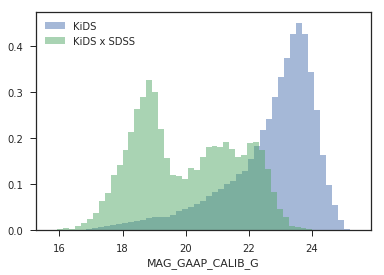

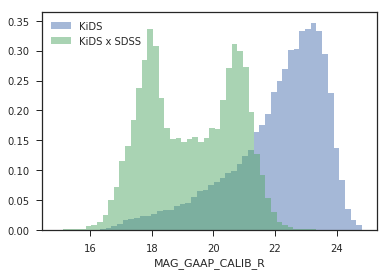

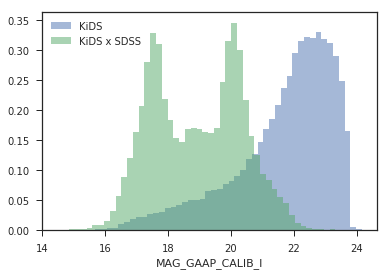

In [7]:
sns.set(style='ticks')
for b in BAND_CALIB_COLUMNS:
    plt.figure()
    sns.distplot(kids[b], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss[b], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS Colors

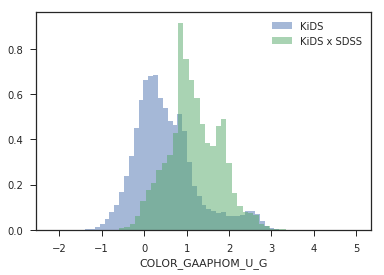

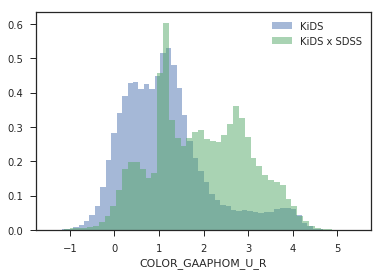

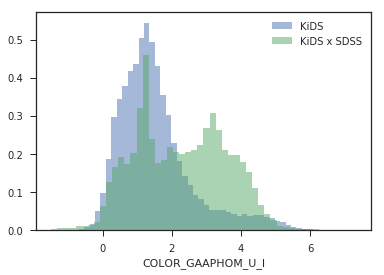

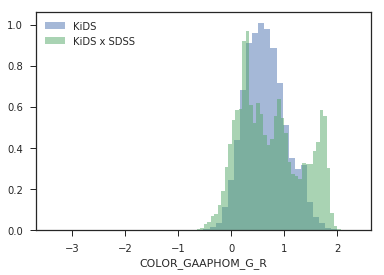

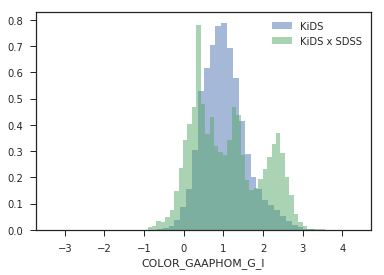

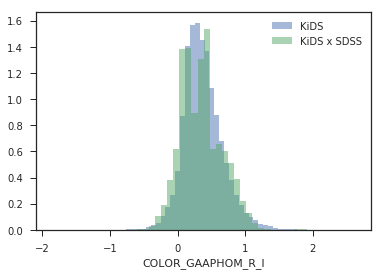

In [8]:
sns.set(style='ticks')
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_clean[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS R < 22

In [10]:
kids_cut = kids.loc[kids[MAG_GAAP_R] < 22]
kids_x_sdss_cut = kids_x_sdss.loc[kids_x_sdss[MAG_GAAP_R] < 22]

In [11]:
print(kids.shape)
print(kids_cut.shape)

(50084, 41)
(18131, 41)


In [12]:
print(kids_x_sdss.shape)
print(kids_x_sdss_cut.shape)

(26237, 48)
(23770, 48)


In [13]:
print(np.unique(kids_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12507,  5284,  8446]))


In [14]:
print(np.unique(kids_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12089,  4352,  7329]))


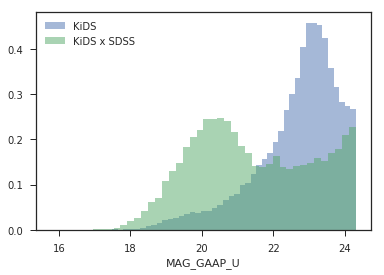

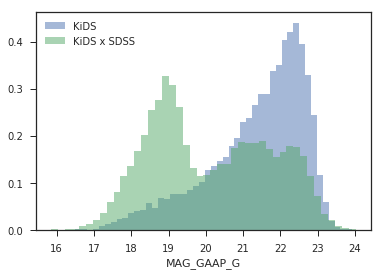

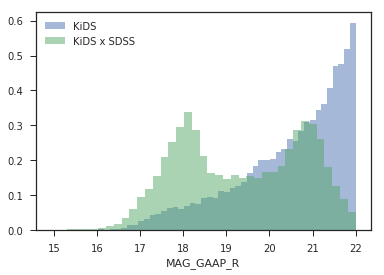

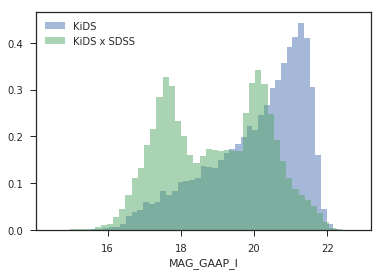

In [20]:
sns.set(style='ticks')
for c in BAND_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

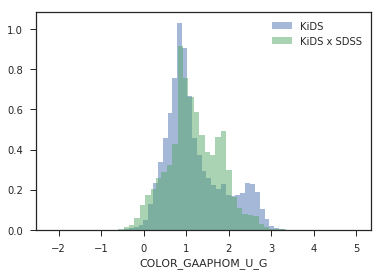

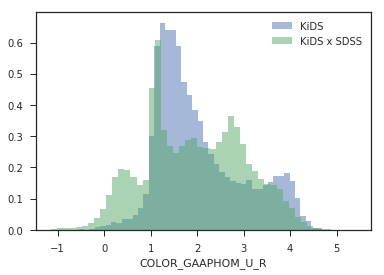

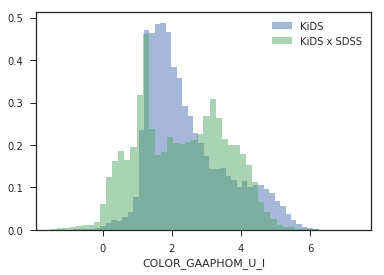

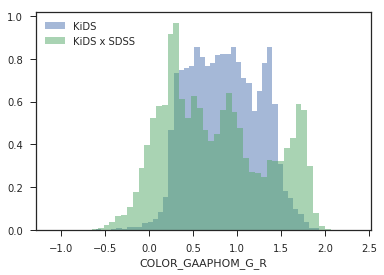

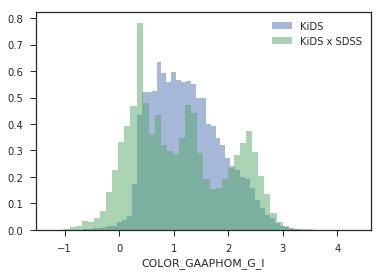

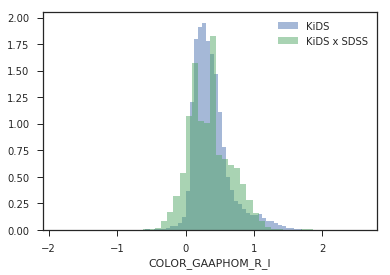

In [21]:
sns.set(style='ticks')
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS color cuts

In [6]:
kids_cut = kids.loc[kids[COLOR_GAAPHOM_U_G] > 0]
kids_x_sdss_cut = kids_x_sdss.loc[kids_x_sdss[COLOR_GAAPHOM_U_G] > 0]

In [7]:
print(kids.shape)
print(kids_cut.shape)

(50084, 41)
(37767, 41)


In [8]:
print(kids_x_sdss.shape)
print(kids_x_sdss_cut.shape)

(24021, 48)
(23419, 48)


In [9]:
print(np.unique(kids_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12113,  4552,  7356]))


In [10]:
print(np.unique(kids_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12090,  4098,  7231]))


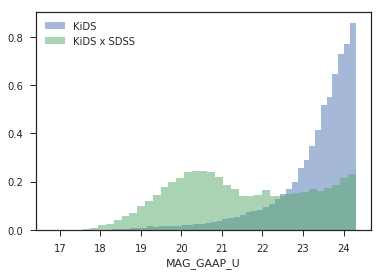

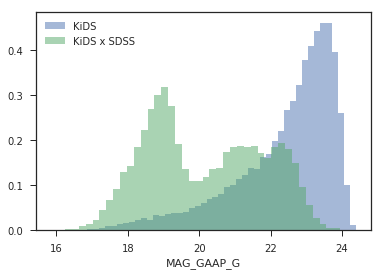

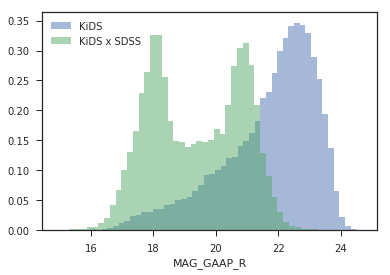

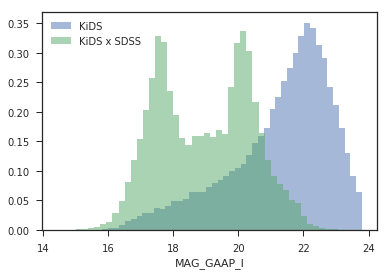

In [27]:
sns.set(style='ticks')
for c in BAND_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

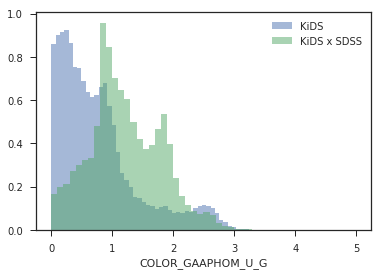

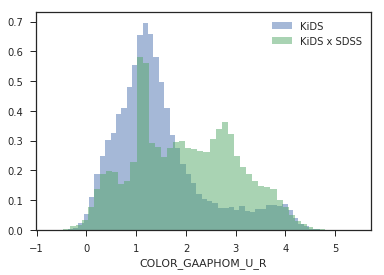

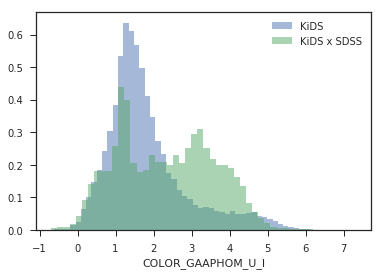

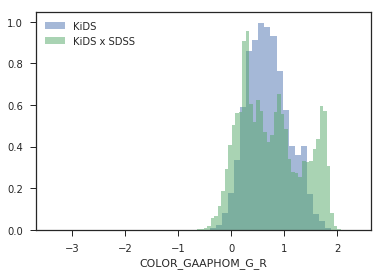

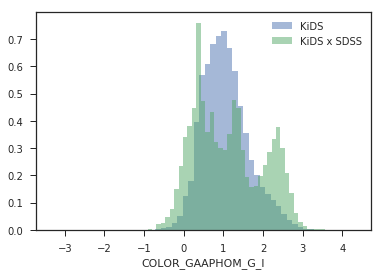

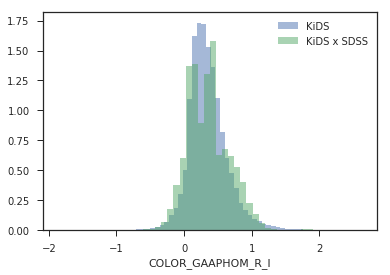

In [28]:
sns.set(style='ticks')
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS cut comparison with t-SNE

In [26]:
def add_cut_label(data):
    data['cut_label'] = 'left'
    data.loc[data[COLOR_GAAPHOM_U_G] < 0, 'cut_label'] = 'u-g_cut'
    data.loc[data[MAG_GAAP_R] > 22, 'cut_label'] = 'r_cut'
    data.loc[(data[MAG_GAAP_R] > 22) & (data[COLOR_GAAPHOM_U_G] < 0), 'cut_label'] = 'both_cuts'
    return data

In [27]:
kids_merged = kids_x_sdss.append(kids.loc[~kids['ID'].isin(kids_x_sdss['ID'])].sample(10000, random_state=1467))

In [28]:
kids_merged = add_cut_label(kids_merged)

In [29]:
kids_merged['is_in_SDSS'] = kids_merged['ID'].isin(kids_x_sdss['ID'])

In [30]:
kids_sampled = kids_merged.sample(10000, random_state=1467)

## KiDS colors + magnitudes

In [11]:
kids_features = MinMaxScaler().fit_transform(kids_sampled[np.concatenate([BAND_COLUMNS, COLOR_COLUMNS])])

In [12]:
kids_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                     n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=1,
                     random_state=4680, method='barnes_hut', angle=0.5).fit_transform(kids_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 0.285s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.035036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.166176
[t-SNE] Error after 1000 iterations: 1.143729


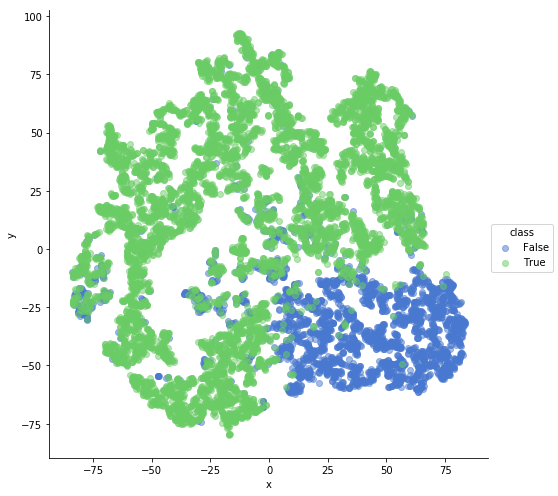

In [13]:
plot_embedding(kids_embedded, kids_sampled['is_in_SDSS'])

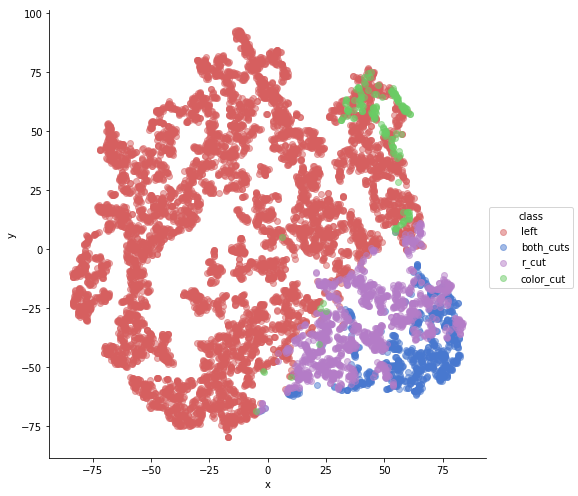

In [14]:
plot_embedding(kids_embedded, kids_sampled['cut_label'])

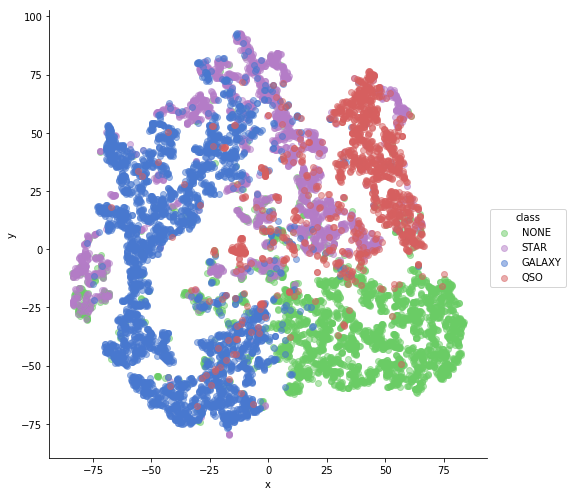

In [15]:
plot_embedding(kids_embedded, kids_sampled['CLASS'].fillna(value='NONE'))

## KiDS colors

In [16]:
kids_colors = MinMaxScaler().fit_transform(kids_sampled[COLOR_COLUMNS])

In [17]:
kids_colors_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                            n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=1,
                            random_state=4680, method='barnes_hut', angle=0.5).fit_transform(kids_colors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 0.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.013910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.142975
[t-SNE] Error after 1000 iterations: 1.031105


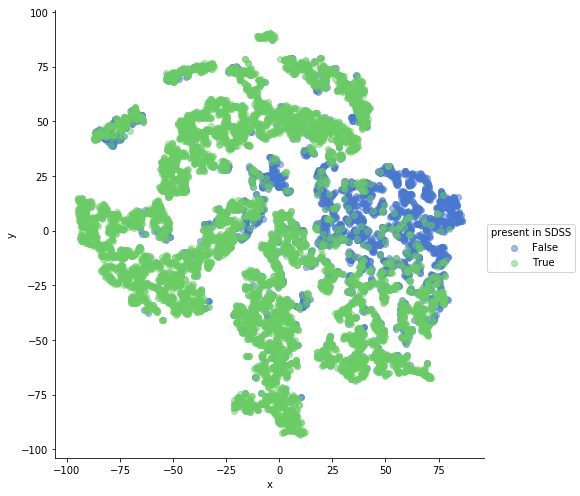

In [18]:
plot_embedding(kids_colors_embedded, kids_sampled['is_in_SDSS'], label_name='present in SDSS')

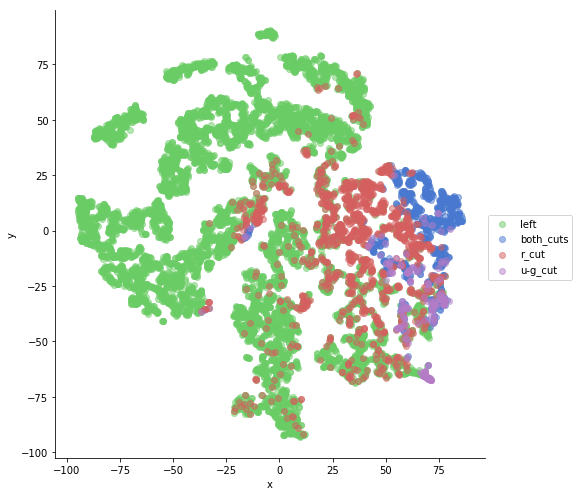

In [31]:
plot_embedding(kids_colors_embedded, kids_sampled['cut_label'], label_name='')

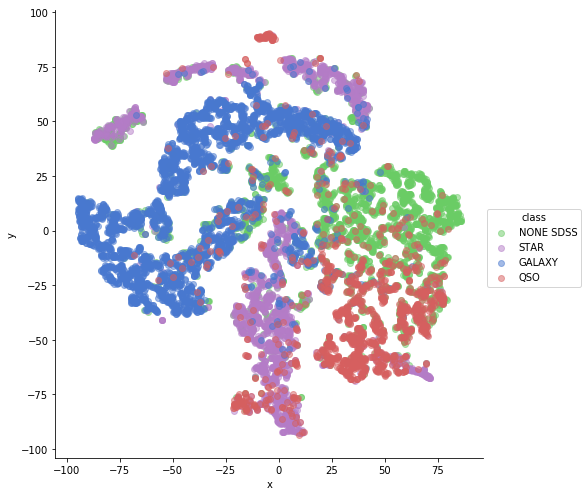

In [23]:
plot_embedding(kids_colors_embedded, kids_sampled['CLASS'].fillna(value='NONE SDSS'))

# KiDS STAR

In [3]:
kids_star = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.star.cols.csv')

Data shape: (4514831, 37)
Droping NANs: 4514831 left
Removing flags: 1976131 left
Removing errors bigger than 1: 1553465 left
Removing limiting magnitudes: 983000 left
Clean KiDS shape: (983000, 41)


In [4]:
kids_star_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.star.cols.csv')

Data shape: (30940, 42)
Droping NANs: 30940 left
Removing flags: 13861 left
Removing errors bigger than 1: 13646 left
Removing limiting magnitudes: 13313 left
Clean KiDS shape: (13313, 46)


In [5]:
kids_star_x_sdss_clean = clean_sdss(kids_star_x_sdss)

Cleaning SDSS: 11413 left


## R cut

In [6]:
kids_star_cut = kids_star.loc[kids_star[MAG_GAAP_R] < 22]
kids_star_x_sdss_cut = kids_star_x_sdss_clean.loc[kids_star_x_sdss_clean[MAG_GAAP_R] < 22]

In [7]:
print(kids_star.shape)
print(kids_star_cut.shape)

(983000, 41)
(770731, 41)


In [8]:
print(kids_star_x_sdss.shape)
print(kids_star_x_sdss_cut.shape)

(13313, 46)
(11225, 46)


In [9]:
print(np.unique(kids_star_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 251, 4765, 8297]))


In [10]:
print(np.unique(kids_star_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  61, 3941, 7223]))


## Color cut

In [18]:
kids_star_cut = kids_star.loc[kids_star[COLOR_GAAPHOM_U_G] > 0]
kids_star_x_sdss_cut = kids_star_x_sdss_clean.loc[kids_star_x_sdss_clean[COLOR_GAAPHOM_U_G] > 0]

In [19]:
print(kids_star.shape)
print(kids_star_cut.shape)

(983000, 41)
(940463, 41)


In [20]:
print(kids_star_x_sdss.shape)
print(kids_star_x_sdss_cut.shape)

(13313, 46)
(10844, 46)


In [23]:
print(np.unique(kids_star_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 251, 4765, 8297]))


In [26]:
print(np.unique(kids_star_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  56, 3666, 7122]))


In [ ]:
# TODO: rest of the plots

# KiDS GAIA

In [11]:
kids_gaia = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.cols.csv')

Data shape: (1525462, 37)
Droping NANs: 1525462 left
Removing flags: 599223 left
Removing errors bigger than 1: 580040 left
Removing limiting magnitudes: 513104 left
Clean KiDS shape: (513104, 41)


In [12]:
kids_gaia_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.x.SDSS.DR14.cols.csv')

Data shape: (29297, 42)
Droping NANs: 29297 left
Removing flags: 10645 left
Removing errors bigger than 1: 10567 left
Removing limiting magnitudes: 10445 left
Clean KiDS shape: (10445, 46)


In [13]:
kids_gaia_x_sdss_clean = clean_sdss(kids_gaia_x_sdss)

Cleaning SDSS: 10061 left


## R cut

In [14]:
kids_gaia_cut = kids_gaia.loc[kids_gaia[MAG_GAAP_R] < 22]
kids_gaia_x_sdss_cut = kids_gaia_x_sdss_clean.loc[kids_gaia_x_sdss_clean[MAG_GAAP_R] < 22]

In [15]:
print(kids_gaia.shape)
print(kids_gaia_cut.shape)

(513104, 41)
(513098, 41)


In [16]:
print(kids_gaia_x_sdss.shape)
print(kids_gaia_x_sdss_cut.shape)

(10445, 46)
(10060, 46)


In [17]:
print(np.unique(kids_gaia_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2176, 2672, 5597]))


In [18]:
print(np.unique(kids_gaia_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2098, 2522, 5440]))


## Color cut

In [31]:
kids_gaia_cut = kids_gaia.loc[kids_gaia[COLOR_GAAPHOM_U_G] > 0]
kids_gaia_x_sdss_cut = kids_gaia_x_sdss_clean.loc[kids_gaia_x_sdss_clean[COLOR_GAAPHOM_U_G] > 0]

In [32]:
print(kids_gaia.shape)
print(kids_gaia_cut.shape)

(513104, 41)
(510540, 41)


In [33]:
print(kids_gaia_x_sdss.shape)
print(kids_gaia_x_sdss_cut.shape)

(10445, 46)
(9668, 46)


In [34]:
print(np.unique(kids_gaia_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2176, 2672, 5597]))


In [35]:
print(np.unique(kids_gaia_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2098, 2180, 5390]))


In [36]:
# TODO: rest of the plots